In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.externals.six.moves import zip
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

### 1.剃除非數值資料
### 2.剔除nan
### 3.原本資料是有按類別排列，亂序後分割測試資料
### 4.類別轉化成離散數值

In [2]:
def Data_preprocessing (DataFrame):
    # Drop Non-numeric data
    train_drop = train.dropna(axis = 1).drop(["Unnamed: 0","user_name","raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window"],axis=1)
    # shuffle data 
    train_shuffle = train_drop.sample(frac=1).reset_index(drop=True)
    # map class labels words to numbers
    class_mapping = {'A':0,'B':1,'C':2,'D':3,'E':4}
    labels = train_shuffle ["classe"].map(class_mapping).values
    # drop classe make it become traing data
    data = train_shuffle.drop(["classe"],axis=1).values
    return data,labels

### 繪製confusion_matrix

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### 訓練adaboost tree的過程圖繪製

In [4]:
def plot_train(bdt_discrete,bdt_real):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [5]:
def plot_train_error(AdaBoostClassifier1,AdaBoostClassifier2):
    n_trees_discrete = len(bdt_discrete)
    n_trees_real = len(bdt_real)

    # Boosting might terminate early, but the following arrays are always
    # n_estimators long. We crop them to the actual number of trees here:
    discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
    real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
    discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.plot(range(1, n_trees_discrete + 1),
             discrete_test_errors, c='black', label='SAMME')
    plt.plot(range(1, n_trees_real + 1),
             real_test_errors, c='black',
             linestyle='dashed', label='SAMME.R')
    plt.legend()
    plt.ylim(0.18, 0.62)
    plt.ylabel('Test Error')
    plt.xlabel('Number of Trees')

    plt.subplot(132)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
             "b", label='SAMME', alpha=.5)
    plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
             "r", label='SAMME.R', alpha=.5)
    plt.legend()
    plt.ylabel('Error')
    plt.xlabel('Number of Trees')
    plt.ylim((.2,
             max(real_estimator_errors.max(),
                 discrete_estimator_errors.max()) * 1.2))
    plt.xlim((-20, len(bdt_discrete) + 20))

    plt.subplot(133)
    plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
             "b", label='SAMME')
    plt.legend()
    plt.ylabel('Weight')
    plt.xlabel('Number of Trees')
    plt.ylim((0, discrete_estimator_weights.max() * 1.2))
    plt.xlim((-20, n_trees_discrete + 20))

    # prevent overlapping y-axis labels
    plt.subplots_adjust(wspace=0.25)
    plt.show()

In [6]:
# Setting data_path Input trining data
dir_data = 'C:/Users/IRIS168'
f_train = os.path.join(dir_data, 'pml-training.csv')
print('Path of read in data: %s' % (f_train))
train = pd.read_csv(f_train)
train.shape

Path of read in data: C:/Users/IRIS168\pml-training.csv


C:\Users\IRIS168\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(19622, 160)

In [7]:
data,labels =  Data_preprocessing (train)
labels

array([2, 0, 0, ..., 1, 1, 2], dtype=int64)

## 準確度測試

In [8]:
# Partition data
n_split = 15000
data_train, data_test = data[:n_split], data[n_split:]
labels_train, labels_test = labels[:n_split], labels[n_split:]

In [9]:
# Training SAMME & SAMME.R
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    learning_rate=1)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=200,
    learning_rate=1.5,
    algorithm="SAMME")

bdt_real.fit(data_train, labels_train)
bdt_discrete.fit(data_train, labels_train)

real_test_errors = []
discrete_test_errors = []
# Stage wise training for analysiing how it work
for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(data_test), bdt_discrete.staged_predict(data_test)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, labels_test))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, labels_test))

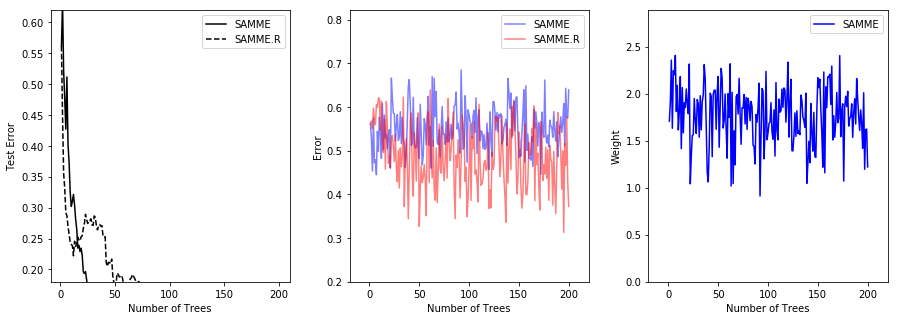

In [10]:
plot_train(bdt_discrete,bdt_real)

In [11]:
y_true = labels_test
y_pred = bdt_real.predict(data_test)
confusion_matrix(y_true, y_pred)
unique_labels(y_true, y_pred)

array([0, 1, 2, 3, 4], dtype=int64)

Confusion matrix, without normalization
[[1248   46   12    9    0]
 [  16  780   40    1    4]
 [   0   27  781   41    1]
 [   0    3   47  715   10]
 [   0   22   10    4  805]]
Normalized confusion matrix
[[0.94904943 0.03498099 0.00912548 0.00684411 0.        ]
 [0.01902497 0.9274673  0.04756243 0.00118906 0.00475624]
 [0.         0.03176471 0.91882353 0.04823529 0.00117647]
 [0.         0.00387097 0.06064516 0.92258065 0.01290323]
 [0.         0.02615933 0.01189061 0.00475624 0.95719382]]


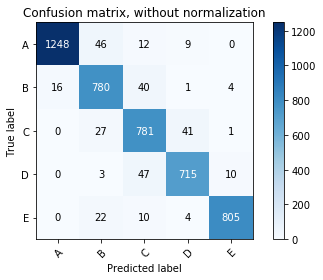

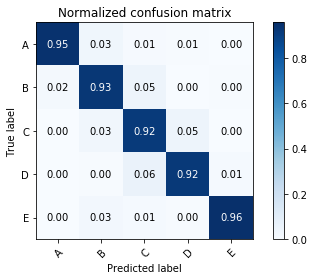

In [12]:
y_true = labels_test
y_pred = bdt_real.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME.R non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME.R normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[1268   24   19    4    0]
 [  24  782   29    3    3]
 [   0   31  789   29    1]
 [   0    0   36  735    4]
 [   3    4    8    6  820]]
Normalized confusion matrix
[[0.96425856 0.01825095 0.01444867 0.00304183 0.        ]
 [0.02853746 0.92984542 0.03448276 0.00356718 0.00356718]
 [0.         0.03647059 0.92823529 0.03411765 0.00117647]
 [0.         0.         0.04645161 0.9483871  0.00516129]
 [0.00356718 0.00475624 0.00951249 0.00713436 0.97502973]]


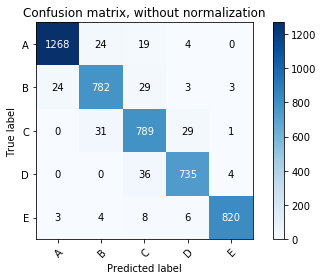

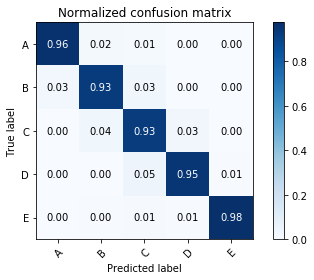

In [13]:
y_true = labels_test
y_pred = bdt_discrete.predict(data_test)
confusion_matrix(y_true, y_pred)
# Plot SAMME non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'],
                      title='Confusion matrix, without normalization')

# Plot SAMME normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=['A','B','C','D','E'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# 實際預測答案

In [14]:
# Input Testing data
f_test = os.path.join(dir_data, 'pml-testing.csv')
print('Path of read in data: %s' % (f_test))
test = pd.read_csv(f_test)
test.shape

Path of read in data: C:/Users/IRIS168\pml-testing.csv


(20, 160)

In [15]:
# Drop Non-numeric data
test = test.dropna(axis = 1).drop(["Unnamed: 0","user_name","raw_timestamp_part_1","raw_timestamp_part_2","cvtd_timestamp","new_window","num_window","problem_id"],axis=1).values
test

array([[ 1.23e+02,  2.70e+01, -4.75e+00, ..., -7.14e+02,  4.19e+02,
         6.17e+02],
       [ 1.02e+00,  4.87e+00, -8.89e+01, ..., -2.37e+02,  7.91e+02,
         8.73e+02],
       [ 8.70e-01,  1.82e+00, -8.85e+01, ..., -5.10e+01,  6.98e+02,
         7.83e+02],
       ...,
       [ 9.20e-01,  5.31e+00, -9.31e+01, ..., -5.00e+02, -2.32e+02,
         3.29e+02],
       [ 1.23e+02,  2.67e+01, -2.68e+00, ..., -6.14e+02, -4.60e+01,
         4.71e+02],
       [ 1.40e+00,  3.20e+00, -8.87e+01, ...,  7.00e+01, -7.03e+02,
         7.40e+01]])

In [16]:
test.shape

(20, 52)

In [17]:
y_pred_discrete = bdt_discrete.predict(test)
y_pred_real = bdt_real.predict(test)

In [18]:
# SAMME predict
y_pred_discrete

array([1, 0, 1, 0, 0, 4, 3, 1, 0, 0, 1, 2, 1, 0, 4, 4, 0, 1, 1, 1],
      dtype=int64)

In [19]:
# SAMME.R predict
y_pred_real

array([1, 0, 1, 0, 0, 2, 3, 1, 0, 0, 1, 2, 1, 0, 4, 4, 0, 1, 1, 1],
      dtype=int64)